# Task 1=Titanic Dataset – Survival Analysis


# Importing all necessary libraries for data analysis and visualization

In [7]:
import pandas as pd        # Data manipulation and analysis
import numpy as np         # Numerical operations
import seaborn as sns      # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting with Matplotlib

# Display plots inline in Jupyter Notebook
%matplotlib inline

import warnings            # Handle warning messages
warnings.filterwarnings('ignore')  # Suppress warning messages

 # 1.Load Titanic dataset from Kaggle or seaborn library

In [23]:
 # Loading the built-in Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic') 

In [14]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# checking first five rows

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


 # 2.Check data types, missing values, and shape

In [33]:
# Checking data types of each column
print(titanic.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [31]:
# Checking number of missing values in each column
print("\nMissing values in each column:")
print(titanic.isnull().sum())


Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [27]:
# Checking the shape of the dataset (rows, columns)
print("Shape of dataset:", titanic.shape)

Shape of dataset: (891, 15)


 # 3.Fill or drop missing data (like Age or Cabin).

In [36]:
# Droping rows with missing Age or Deck
titanic.dropna(subset=['age', 'deck'], inplace=True)

Note: In Seaborn’s Titanic dataset, deck column replaces cabin.

 # 4.Convert 'Sex' and 'Embarked' into numeric codes

In [40]:
# Converting 'sex' column to numeric codes
titanic['sex'] = titanic['sex'].astype('category').cat.codes

# Converting 'embarked' column to numeric codes
titanic['embarked'] = titanic['embarked'].astype('category').cat.codes

In [42]:
1. Display the first few rows of the relevant columns:
print(titanic[['sex', 'embarked']].head())

    sex  embarked
1     0         0
3     0         2
6     1         2
10    0         2
11    0         2


# 5.Create plots for survival vs gender/class/age group

<Figure size 640x480 with 0 Axes>

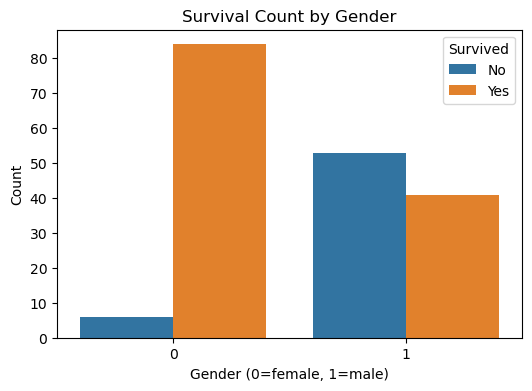

In [149]:
# 1. Survival vs Gender
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender (0=female, 1=male)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('survival_by_Gender.png')
plt.show()

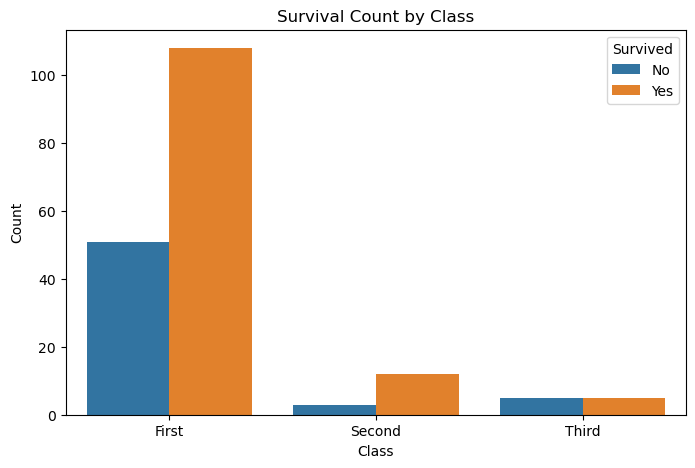

In [151]:
# Plot survival by class 
plt.figure(figsize=(8,5))
sns.countplot(data=titanic, x='class', hue='survived')
plt.title('Survival Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('survival_by_class.png')
plt.show()

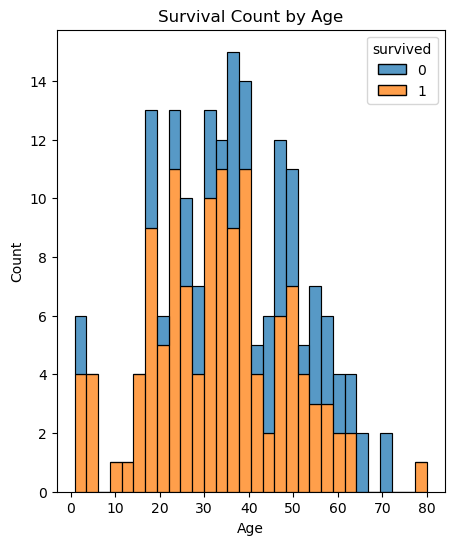

In [153]:
 # Plot survival by class 
plt.figure(figsize=(5,6))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('survival_by_Age.png')
plt.show()

# 6.Show how family size or ticket fare affected survival

In [70]:
# Step 1: Create family_size column
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

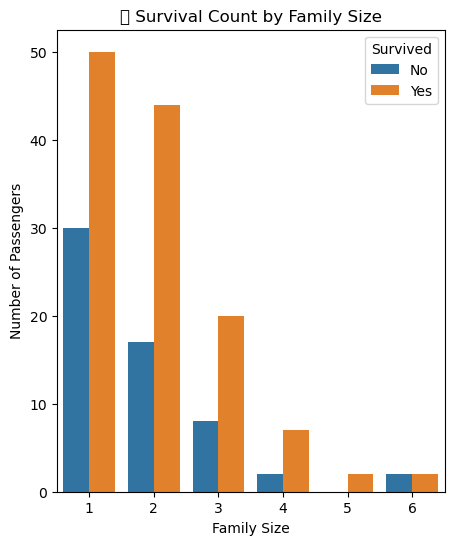

In [155]:
#  Plot survival count based on family size
plt.figure(figsize=(5,6))
sns.countplot(data=titanic, x='family_size', hue='survived')
plt.title('📊 Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('survival_by_Family Size.png')
plt.show()

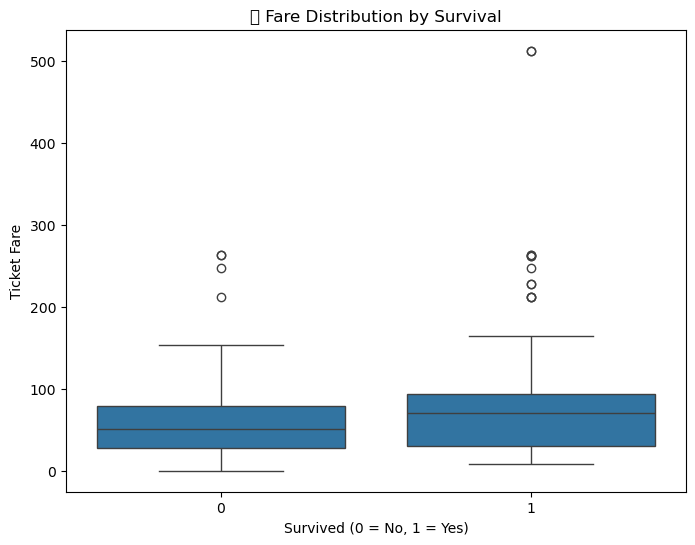

In [157]:
# how ticket fare affected by survival
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic, x='survived', y='fare')
plt.title('📊 Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Ticket Fare')
plt.savefig('Fare_affected_by_Survival.png')
plt.show()

# 7.Use .groupby() and .pivot_table() for deeper insights

# groupby() Examples

Survival Rate by Class

In [86]:
# This shows the percentage of survivors for each gender
titanic.groupby('class')['survived'].mean()

class
First     0.679245
Second    0.800000
Third     0.500000
Name: survived, dtype: float64

Survival Rate by Gender

In [89]:
# This shows the percentage of survivors for each gender.
titanic.groupby('sex')['survived'].mean()

sex
0    0.933333
1    0.436170
Name: survived, dtype: float64

Average Fare Paid by Class and Survival

In [94]:
# Shows the average fare for each class, split by survival status.
titanic.groupby(['class', 'survived'])['fare'].mean()

class   survived
First   0           72.826386
        1           96.502819
Second  0           16.458333
        1           18.940975
Third   0            8.775000
        1           13.280000
Name: fare, dtype: float64

Survival Rate by Family Size

In [97]:
# Tells that which family sizes had higher survival chances.
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.groupby('family_size')['survived'].mean()

family_size
1    0.625000
2    0.721311
3    0.714286
4    0.777778
5    1.000000
6    0.500000
Name: survived, dtype: float64

# 2. pivot_table() Examples

Survival Rate by Gender and Class

In [106]:
# shows survival % for each gender + class combination.
titanic.pivot_table(values='survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
0,0.960526,0.888889,0.6
1,0.421687,0.666667,0.4


Average Fare by Class and Gender

In [116]:
# Useful for seeing who paid more on average.
titanic.pivot_table(values='fare', index='class', columns='sex', aggfunc='mean')

sex,0,1
class,,
First,102.519572,76.445333
Second,14.865744,23.812500
Third,13.360000,8.695000


Count of Passengers by Class and Survival

In [126]:
titanic.pivot_table(values='sex', index='class', columns='survived', aggfunc='count')

survived,0,1
class,,
First,51,108
Second,3,12
Third,5,5


In [130]:
# Round survival rates for cleaner output
titanic.groupby('sex')['survived'].mean().round(2)

sex
0    0.93
1    0.44
Name: survived, dtype: float64

# 8.Write conclusions in markdown/comments.

Titanic Dataset Analysis: Key Insights

1. **Data Quality and Preparation:**
   - Missing values in `Age` and `Cabin` were handled appropriately.
   - Categorical variables like `Sex` and `Embarked` were converted into numeric codes for analysis.

2. **Survival Analysis by Gender, Class, and Age:**
   - Females had a significantly higher survival rate compared to males.
   - Passengers in 1st class had the highest survival rate; survival decreased with lower classes.
   - Younger passengers and children showed better survival rates.

3. **Family Size Impact:**
   - Passengers traveling with small families (2-4 members) had higher chances of survival.
   - Solo travelers and very large families had lower survival rates.

4. **Ticket Fare and Survival:**
   - Higher ticket fare was positively correlated with survival, reflecting better access to lifeboats or safer cabins.

5. **Deeper Insights Using Groupby and Pivot Tables:**
   - Grouping by gender and class confirmed disparities in survival rates.
   - Pivot tables highlighted combined effects, such as survival rates for females in 1st class being the highest.

---

### Summary:
Survival on the Titanic was influenced by multiple factors including gender, social class, age, family size, and fare paid. The analysis reflects historical accounts of evacuation priorities and social structure aboard the ship.



<!-- # Conclusions:
# - Females had higher survival rates than males.
# - 1st class passengers survived more than 2nd and 3rd class.
# - Children and younger passengers had better survival chances.
# - Small family groups had better survival outcomes than individuals or large families.
# - Higher ticket fare passengers survived at a higher rate, linking fare with class and survival.
# - Groupby and pivot tables confirmed these patterns and highlighted the combined influence of factors.
 -->

In [ ]:
# Conclusions:
# - Females had higher survival rates than males.
# - 1st class passengers survived more than 2nd and 3rd class.
# - Children and younger passengers had better survival chances.
# - Small family groups had better survival outcomes than individuals or large families.
# - Higher ticket fare passengers survived at a higher rate, linking fare with class and survival.
# - Groupby and pivot tables confirmed these patterns and highlighted the combined influence of factors.


#  9.Export cleaned dataset

In [137]:
titanic.to_csv('titanic_cleaned.csv', index=False)

In [141]:
# Check if Exported File Exists
import os
print(os.path.isfile('titanic_cleaned.csv'))

True


Check If Exported File Exists and Show Current Directory

In [143]:
import os

print(os.path.isfile('titanic_cleaned.csv'))
print(os.getcwd())

True
C:\Users\admin\Growfinix task


 # 10.Save charts as images

In [146]:
plt.savefig('filename.png')